In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.applications import VGG16

In [19]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [20]:
train_images = train_images
train_labels = train_labels

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
#Validation split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, shuffle=True)

In [22]:
vgg_base = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

In [23]:
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

In [24]:
resnet_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [25]:
#Model
model = models.Sequential()

model.add(vgg_base)

#model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [27]:
vgg_base.trainable = False

In [28]:
resnet_base.trainable = False

In [29]:
len(model.trainable_weights)

4

In [30]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 37s 29ms/step - loss: 2.0655 - accuracy: 0.1846 - val_loss: 1.7370 - val_accuracy: 0.2598
Epoch 2/30
1250/1250 [==============================] - 36s 29ms/step - loss: 1.6301 - accuracy: 0.3308 - val_loss: 1.4800 - val_accuracy: 0.4755
Epoch 3/30
1250/1250 [==============================] - 36s 29ms/step - loss: 1.3112 - accuracy: 0.5177 - val_loss: 1.1639 - val_accuracy: 0.5962
Epoch 4/30
1250/1250 [==============================] - 37s 29ms/step - loss: 1.0486 - accuracy: 0.6355 - val_loss: 1.0511 - val_accuracy: 0.6457
Epoch 5/30
1250/1250 [==============================] - 37s 29ms/step - loss: 0.8990 - accuracy: 0.6918 - val_loss: 0.8616 - val_accuracy: 0.7170
Epoch 6/30
1250/1250 [==============================] - 37s 29ms/step - loss: 0.7882 - accuracy: 0.7309 - val_loss: 0.8798 - val_accuracy: 0.7046
Epoch 7/30
1250/1250 [==============================] - 37s 29ms/step - loss: 0.7008 - accuracy: 0.7611 - val_loss: 0.8220 -

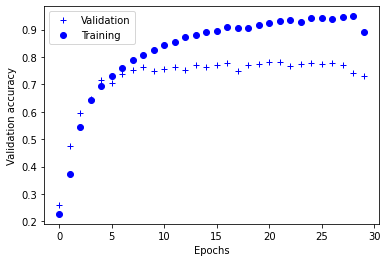

In [31]:
epochs = range(0, 30)
train_accuracy = model_history.history['accuracy']
val_accuracy= model_history.history['val_accuracy']

plt.plot(epochs, val_accuracy, 'b+', label='Validation')
plt.plot(epochs, train_accuracy, 'bo', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()